In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter 
import datetime
import wordcloud
import json 

In [4]:
#Reading the dataset
df = pd.read_csv("./dataCSV/USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [8]:
#Check for missing values in each column.
df.isnull().sum().sort_values(ascending=False)

description               570
video_error_or_removed      0
ratings_disabled            0
comments_disabled           0
thumbnail_link              0
comment_count               0
dislikes                    0
likes                       0
views                       0
tags                        0
publish_time                0
category_id                 0
channel_title               0
title                       0
trending_date               0
video_id                    0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [10]:
df["description"]=df["description"].fillna(value="")

In [11]:
#Double check that now there are no Null values.
f.isnull().sum().sort_values(ascending=False)

description               0
video_error_or_removed    0
ratings_disabled          0
comments_disabled         0
thumbnail_link            0
comment_count             0
dislikes                  0
likes                     0
views                     0
tags                      0
publish_time              0
category_id               0
channel_title             0
title                     0
trending_date             0
video_id                  0
dtype: int64

In [38]:
#The average number of likes of trending videos 
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [40]:
#likes and views are highly positively correlated.
df.corr().round(2)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00


In [28]:
#Data Collection
year_db= df["trending_date"].apply(lambda x:"20"+ x[:2]).value_counts() \
.to_frame().reset_index().rename(columns={"index":"Year","trending_date":"No_Videos"})
year_db

,Year,No_Videos
0,2018,31349
1,2017,9600


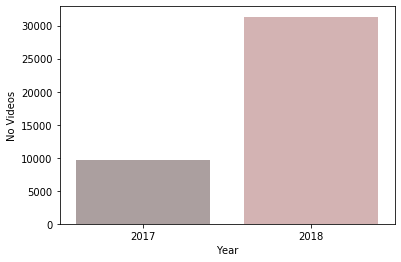

In [37]:
#Plot years.
fig, ax=plt.subplots()
_=sns.barplot(x="Year",y="No_Videos",data=year_db,palette=sns.color_palette(['#ad9d9d', '#d9adad'], n_colors=7),ax=ax)
_=ax.set(xlabel="Year",ylabel="No Videos")

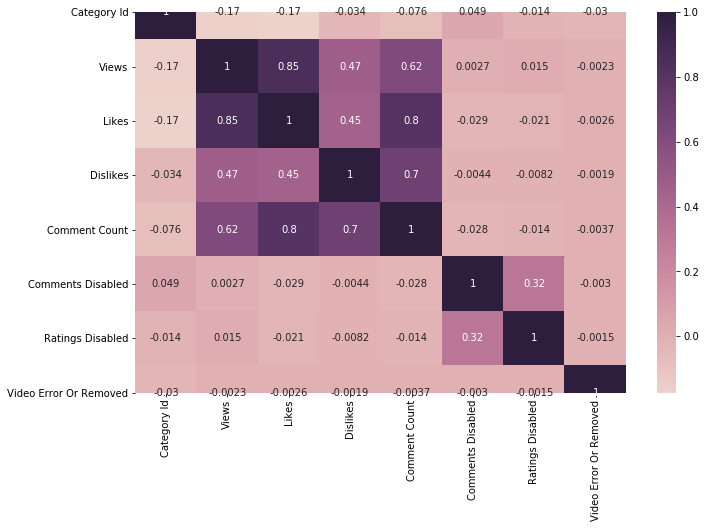

In [43]:
#Heatmap.
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(11,7))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels,\
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)